# step 01

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# step 2

In [48]:
df = sns.load_dataset('titanic')
df1 = sns.load_dataset('tips')
# df = df.sample(100)

# step 3

In [37]:
df.shape #row are called instances
#cols are called series

(100, 15)

# step 4

In [4]:
#data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# step 4

In [5]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
#percentile calculation of missing values
df.isnull().sum()/df.shape[0] * 100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


# step 5

In [11]:
#step-4 split variables for new columns needed / Featuring Engeering
Cdata = pd.DataFrame(np.array([['Lahore, Pakistan',10,100],['Beiging, China',20,299],['Berlin, Jermany',39,20]]),columns = ['Address','Males','Females'])

Cdata

,Address,Males,Females
0,"Lahore, Pakistan",10,100
1,"Beiging, China",20,299
2,"Berlin, Jermany",39,20


In [12]:
Cdata [['City','Country']] = Cdata['Address'].str.split(', ',expand = True)
Cdata

,Address,Males,Females,City,Country
0,"Lahore, Pakistan",10,100,Lahore,Pakistan
1,"Beiging, China",20,299,Beiging,China
2,"Berlin, Jermany",39,20,Berlin,Jermany


# step 6

In [13]:
# type Casting /conversion of dtype
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3 non-null      object
 1   Males    3 non-null      object
 2   Females  3 non-null      object
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [16]:
# to convert into an int
Cdata[['Males','Females']] = Cdata[['Males','Females']].astype('int64')

Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3 non-null      object
 1   Males    3 non-null      int64 
 2   Females  3 non-null      int64 
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 248.0+ bytes


In [51]:
# to str
Cdata[['City','Country']] = Cdata[['City','Country']].astype("str")

Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3 non-null      object
 1   Males    3 non-null      int64 
 2   Females  3 non-null      int64 
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 248.0+ bytes


# step 7

In [18]:
# summary statics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# step 8

In [22]:
# value count of a coulmn
df.age.value_counts(ascending = True)
df.pclass.value_counts()
df.sex.value_counts()

,count
sex,
male,577
female,314


In [26]:
# finding the unique values in a column/series
df.pclass.unique()
df.sex.unique()


array(['male', 'female'], dtype=object)

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
708,1,1,female,22.00,0,0,151.5500,S,First,woman,False,NaN,Southampton,yes,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
244,0,3,male,30.00,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
712,1,1,male,48.00,1,0,52.0000,S,First,man,True,C,Southampton,yes,False


In [39]:
southampton = df[df.embark_town == "Southampton"]
southampton

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
708,1,1,female,22.0,0,0,151.550,S,First,woman,False,NaN,Southampton,yes,True
87,0,3,male,NaN,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
712,1,1,male,48.0,1,0,52.000,S,First,man,True,C,Southampton,yes,False
808,0,2,male,39.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
775,0,3,male,18.0,0,0,7.750,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,2,female,17.0,0,0,10.500,S,Second,woman,False,NaN,Southampton,yes,True
548,0,3,male,33.0,1,1,20.525,S,Third,man,True,NaN,Southampton,no,False
18,0,3,female,31.0,1,0,18.000,S,Third,woman,False,NaN,Southampton,no,False
432,1,2,female,42.0,1,0,26.000,S,Second,woman,False,NaN,Southampton,yes,False


In [49]:
alive = df[df.alive == 'yes']
alive.shape

(342, 15)

In [50]:
dead = df[df.survived == 0]
dead.shape

(549, 15)

# step 9

In [27]:
# deal with duplicates
df.duplicated().sum()

107

# step 10

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: ylabel='Count'>

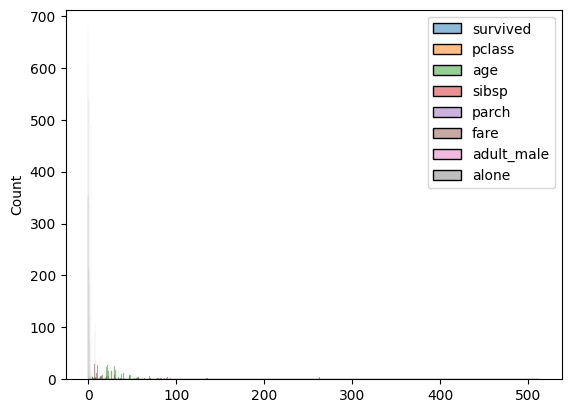

In [28]:
sns.histplot(df) # bad plot

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='age'>

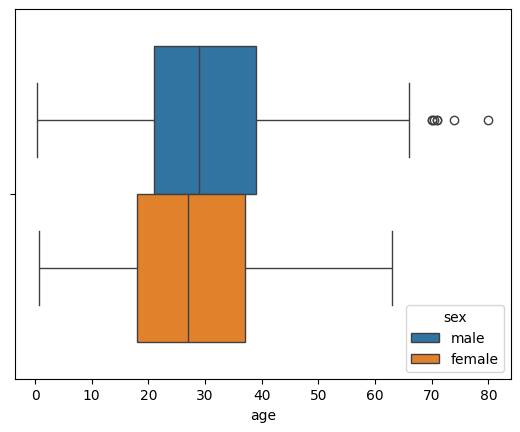

In [35]:
sns.boxplot(x = 'age',hue = 'sex',data = df)

# step 11


In [52]:
corr = df.corr()

ValueError: could not convert string to float: 'male'